In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

In [3]:
raw_data = pd.read_csv("~/Term_project/databases/historical_stock_prices.csv")

In [4]:
df = raw_data[['ticker','close','date']]

In [5]:
df = df.sort_values(by ='date' )

In [6]:
df = df.reset_index(drop=True)

In [7]:
sums = []
for value in (df.loc[df.columns == 'date']):
    unique_dates = df[value].unique()
unique_dates

array(['1970-01-02', '1970-01-05', '1970-01-06', ..., '2018-08-22',
       '2018-08-23', '2018-08-24'], dtype=object)

In [8]:
count = df.groupby('date')['close'].count()
values = df.groupby('date')['close'].sum()

In [49]:
prices = []
for x in range(len(values)):
    prices.append((values[x]/count[x]))

In [50]:
prices_col = pd.Series(prices)

In [51]:
pro_df = pd.DataFrame(unique_dates, columns = ['Date']) 
pro_df['Index Price'] = prices_col.values

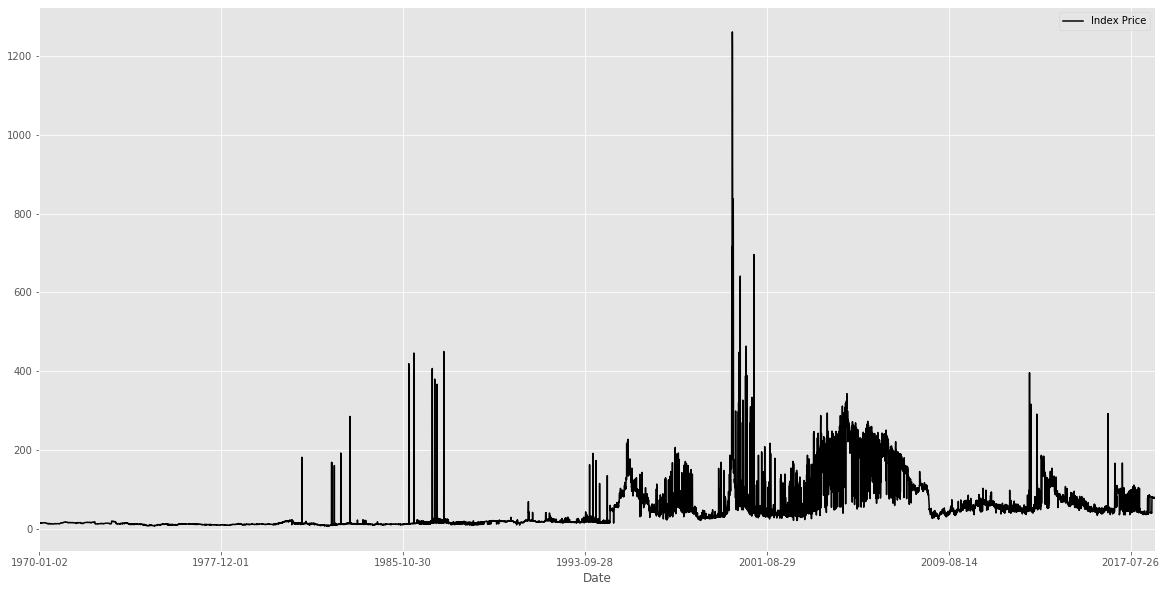

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(20, 10))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

# gca stands for 'get current axis'
ax = plt.gca()

pro_df.plot(kind='line',x='Date',y='Index Price',ax=ax, color = 'black')
plt.show()

In [54]:
list_data = range(0, 12274)
X = np.reshape(list_data, (-1, 1))
Y = pro_df["Index Price"]
reg = LassoCV(cv=5, random_state=0).fit(X, Y) #Fit Lasso linear model with coordinate descent using 5-Fold
predicted_prices = reg.predict(X[:12274]) #makes some predictions
reg.score(X,Y) #predicting the exact value of Y

0.20986476007460886

In [55]:
predicted_prices_col = pd.Series(predicted_prices)
pro_df['Predicted Price'] = predicted_prices_col.values
pro_df

,Date,Index Price,Predicted Price
0,1970-01-02,15.516518,15.461629
1,1970-01-05,16.017845,15.467456
2,1970-01-06,16.015572,15.473283
3,1970-01-07,15.851748,15.479109
4,1970-01-08,15.873367,15.484936
5,1970-01-09,15.716114,15.490763
6,1970-01-12,15.563911,15.496590
7,1970-01-13,15.388903,15.502417
8,1970-01-14,15.145137,15.508244
9,1970-01-15,14.950048,15.514071


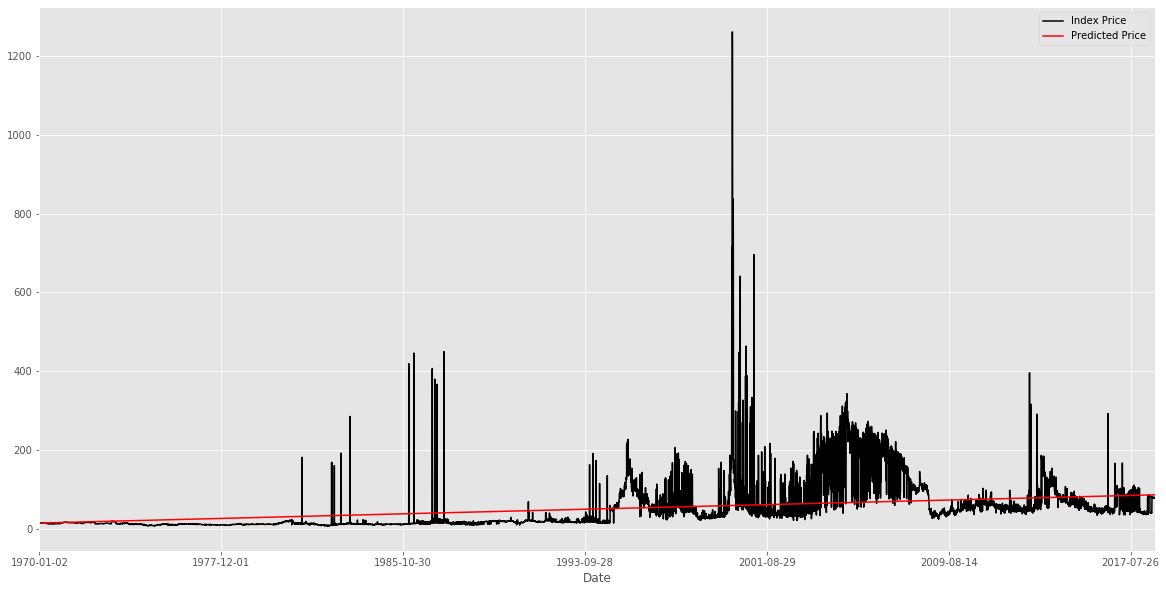

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(20, 10))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

# gca stands for 'get current axis'
ax = plt.gca()

pro_df.plot(kind='line',x='Date',y='Index Price',ax=ax, color = 'black')
pro_df.plot(kind='line',x='Date',y='Predicted Price',ax=ax, color= 'red')
plt.show()